<a href="https://colab.research.google.com/github/DommiiUdomp/Dommii/blob/main/IntroImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler

# **Number digit Classification**

In [64]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

In [65]:
X.shape

(1797, 64)

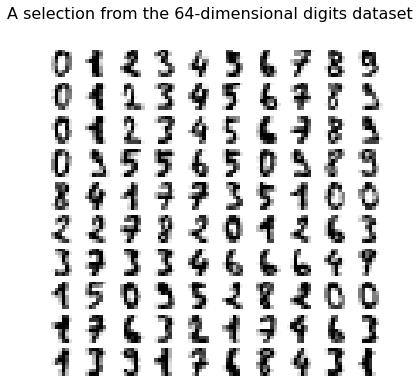

In [66]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [67]:
#Embedding techniques comparison
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

In [68]:
embed = {"Random projection embedding": SparseRandomProjection(n_components=2, random_state=42),
         "Truncated SVD embedding": TruncatedSVD(n_components=2),
         "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(n_components=2),
         "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
         "Standard LLE embedding": LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method="standard"),
         "Modified LLE embedding": LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method="modified"),
         #"Hessian LLE embedding": LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method="hessian"),
         "LTSA LLE embedding": LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method="ltsa"),
         "MDS embedding": MDS(n_components=2, n_init=1, max_iter=100),
         "Random Trees embedding": make_pipeline(RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),TruncatedSVD(n_components=2)),
         "Spectral embedding": SpectralEmbedding(n_components=2, random_state=0, eigen_solver="arpack"),
         "t-SNE embeedding": TSNE(n_components=2, init="pca", learning_rate="auto", random_state=0),
         "NCA embedding": NeighborhoodComponentsAnalysis(n_components=2, init="random", random_state=0)}

In [69]:
X = MinMaxScaler().fit_transform(X)
shown_images = np.array([[1.0, 1.0]])  # just something big

In [70]:
X.shape[0]

1797

In [71]:
from time import time

projections, timing = {}, {}
for name, transformer in embed.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing LTSA LLE embedding...


/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:937: LinAlgWarning: Diagonal number 1265 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Computing NCA embedding...


In [73]:
def plot_embedding(X, title, ax):
    X = MinMaxScaler().fit_transform(X)

    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        ax.text(
            X[i, 0],
            X[i, 1],
            str(y[i]),
            color=plt.cm.Dark2(y[i]),
            fontdict={"weight": "bold", "size": 9},
        )

        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy 

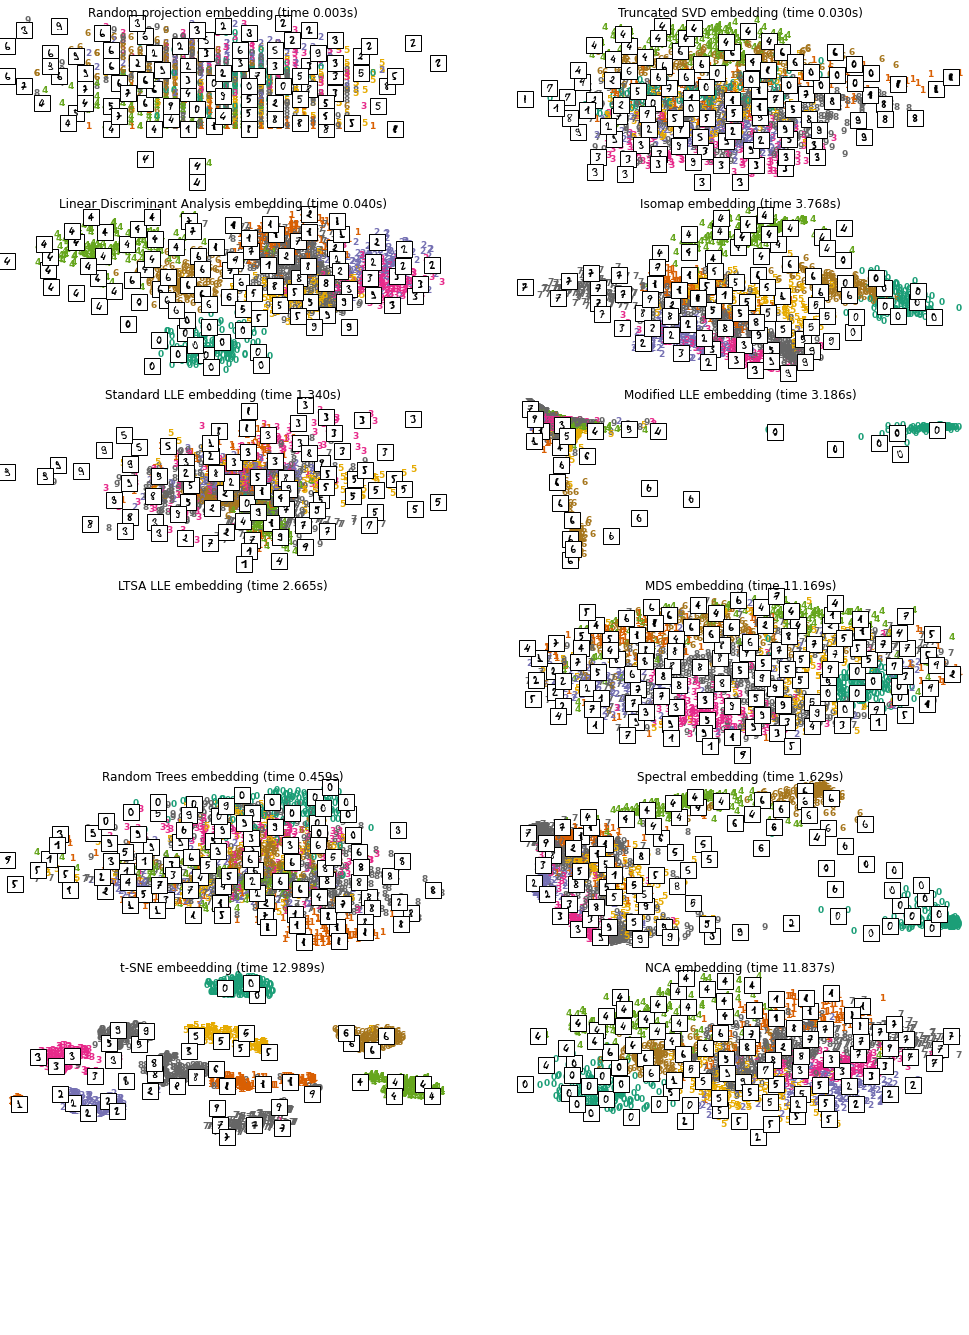

In [74]:
from itertools import zip_longest

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(17, 24))

for name, ax in zip_longest(timing, axs.ravel()):
    if name is None:
        ax.axis("off")
        continue
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title, ax)

plt.show()

# **Face Classification**

In [78]:
from sklearn.datasets import fetch_olivetti_faces

In [79]:
data = fetch_olivetti_faces()
X, y = data.data, data.target
mask = y < 10 #Limit the dataset to 10 classes.
X = X[mask]
y = y[mask]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [80]:
X.shape

(100, 4096)

In [89]:
from sklearn.ensemble import RandomForestClassifier
import time
import matplotlib.pyplot as plt

Elapsed time to compute the importances: 0.661 seconds


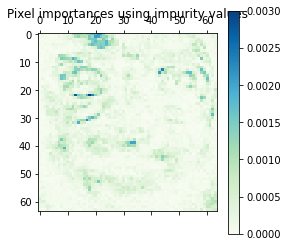

In [92]:
forest = RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=43)
forest.fit(X, y)

start_time = time.time()
img_shape = data.images[0].shape
importances = forest.feature_importances_
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.GnBu)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()